In [402]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [403]:
df = pd.read_csv("german_credit.csv", index_col=False)

In [404]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [406]:
df.shape

(1000, 21)

In [407]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_as_income_perc,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_res_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credits_this_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
people_under_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0


In [408]:
df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [409]:
df.isnull().sum()

default                       0
account_check_status          0
duration_in_month             0
credit_history                0
purpose                       0
credit_amount                 0
savings                       0
present_emp_since             0
installment_as_income_perc    0
personal_status_sex           0
other_debtors                 0
present_res_since             0
property                      0
age                           0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
dtype: int64

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [410]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

In [411]:
A50_train, Y = train_test_split(df, test_size=0.5,random_state=99)
Y50_train = Y.iloc[:,1:]
Y50_test = Y.iloc[:,0]

In [412]:
#X_train = Train Set, X_test = train_labels, y_train = test_set, y_test = test_labels
print("Train Set ------->", A50_train.shape)
print('Test Set ------->', A50_test.shape)

Train Set -------> (500, 21)
Test Set -------> (500,)


default
0    347
1    153
dtype: int64


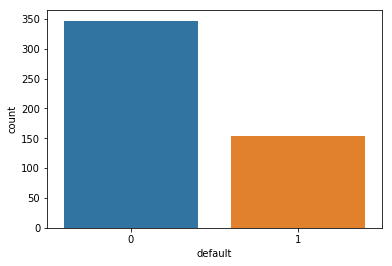

In [413]:
# Lets build a Ensemble model but need to modify the dataset first
sns.countplot(A50_train.default)
print(A50_train.groupby('default').size())

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [414]:
# Print Shape of model 
A50_train.shape

(500, 21)

In [415]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

account_check_status
0 <= ... < 200 DM                                     131
< 0 DM                                                139
>= 200 DM / salary assignments for at least 1 year     30
no checking account                                   200
dtype: int64


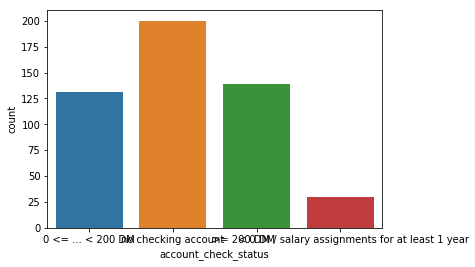

In [416]:
sns.countplot(A50_train.account_check_status)
print(A50_train.groupby('account_check_status').size())

In [417]:
A50_train = pd.get_dummies(A50_train)

In [418]:
A50_train.head()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
194,1,45,3031,4,4,21,1,1,1,0,...,0,1,0,1,0,0,1,0,0,1
714,1,60,14027,4,2,27,1,1,1,0,...,1,0,1,0,0,0,0,1,0,1
102,0,6,932,3,2,24,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
767,0,10,2901,1,4,31,1,1,0,0,...,0,1,0,1,0,0,1,0,0,1
791,0,24,6313,3,4,41,1,2,0,0,...,1,0,1,0,0,0,0,1,0,1


In [419]:
A50_train.shape

(500, 62)

### Check for highly correlated variables but don't required any treatment for this use case

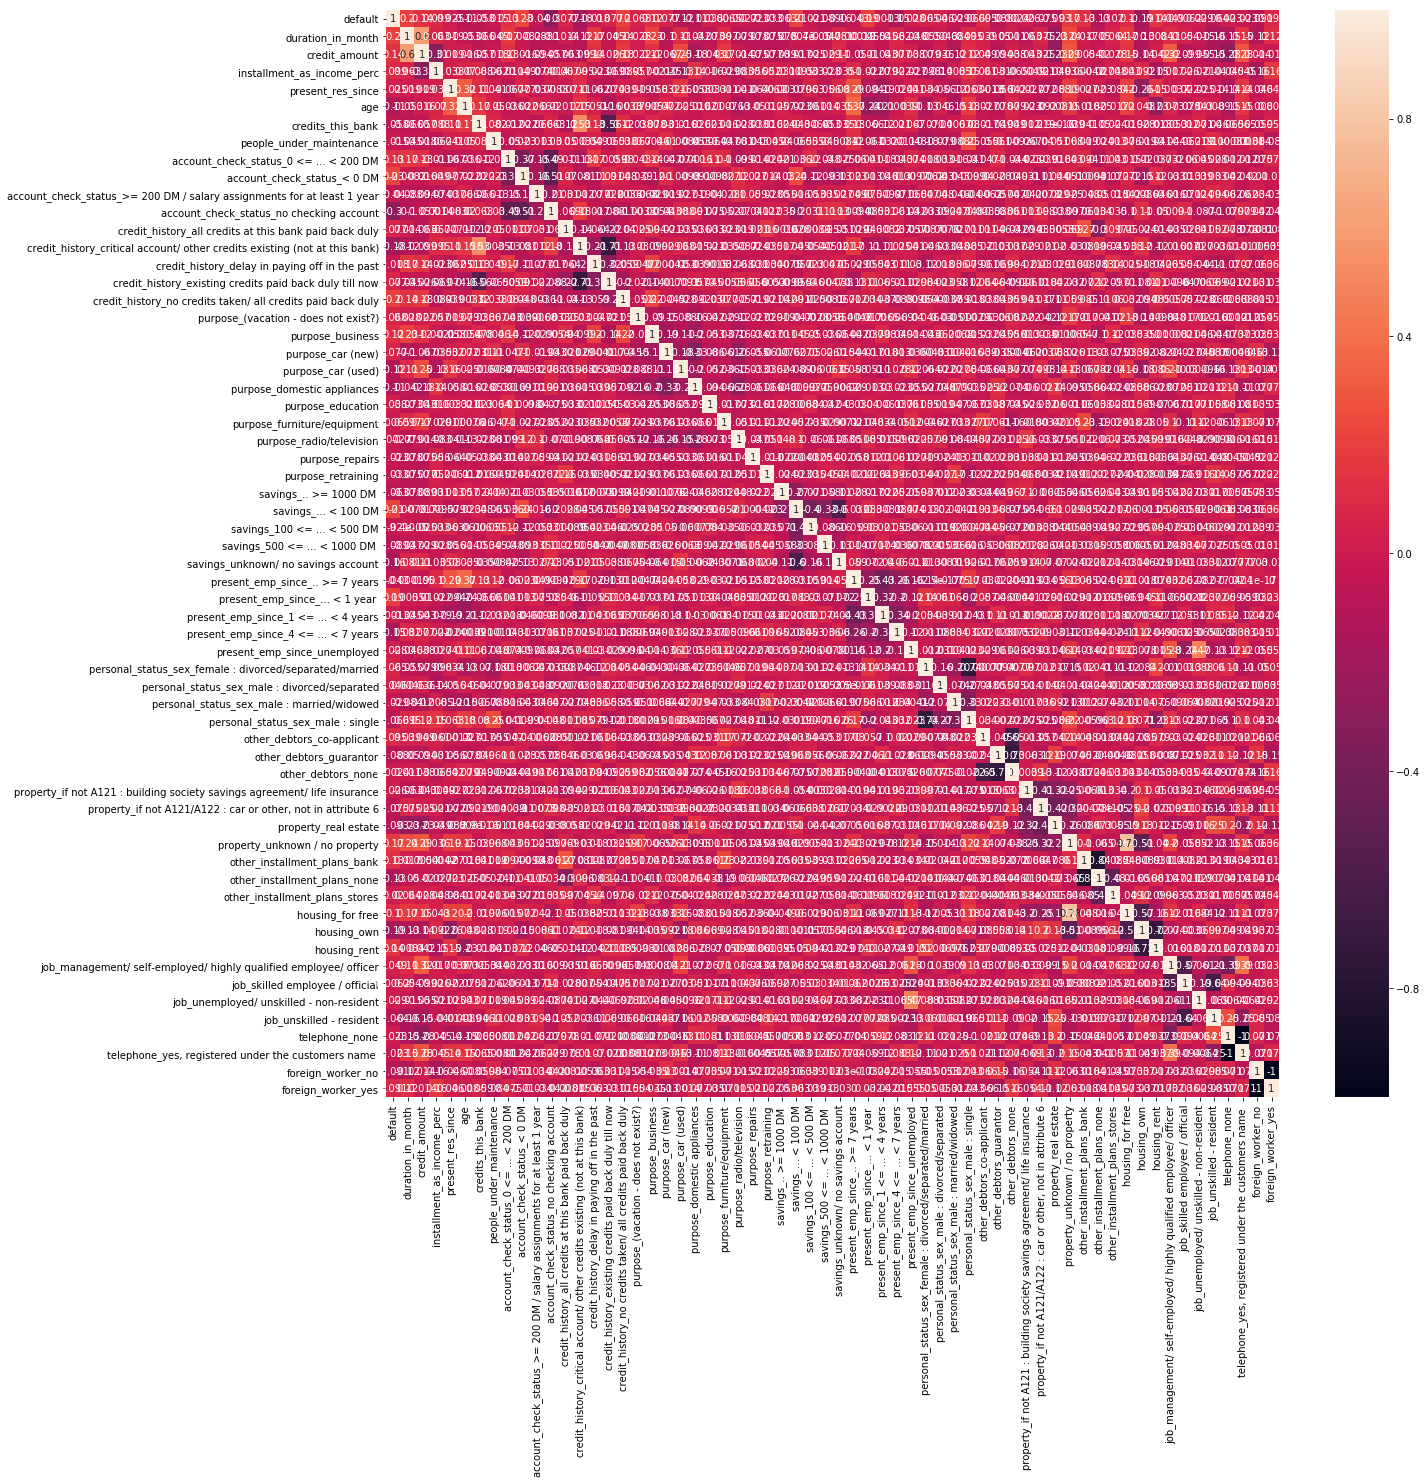

In [420]:
plt.figure(figsize=(20,20)) 
sns.heatmap(A50_train.corr(),annot=True)

### Drop the original variables which are converted to dummy

In [421]:
# We already droped veriable While creating dummy veriables

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [422]:
X1 = A50_train.drop("default" , axis=1)
X2 = A50_train.pop("default")
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X1, X2, test_size=.30, random_state=99)

In [423]:
#X_train = Train Set, X_test = train_labels, y_train = test_set, y_test = test_labels
print("Train_Set ------->", X_train.shape)
print("Train_labels ---->",Y_train.shape)
print('Test_labels------>',Y_test.shape)
print('Test_set -------->', X_test.shape)

Train_Set -------> (350, 61)
Train_labels ----> (350,)
Test_labels------> (150,)
Test_set --------> (150, 61)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [424]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 500,n_jobs=2,random_state=9999,criterion="entropy")
rfc = rfc.fit(X_train, Y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [425]:
#Confusion Matrix and Classification Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score   

In [426]:
y_predict = rfc.predict(X_test)
print(rfc.score(X_test , Y_test))
print(sklearn.metrics.confusion_matrix(Y_test, y_predict))

0.786666666667
[[101  10]
 [ 22  17]]


In [427]:
# predicting 1 as one is 
print("Predicting Defaulter as Defaulter is = ", sklearn.metrics.precision_score(Y_test,y_predict))
print("i.e, ", sklearn.metrics.precision_score(Y_test,y_predict)*100,"%")

Predicting Defaulter as Defaulter is =  0.62962962963
i.e,  62.962962963 %


In [428]:
print("Predicting Non-Defaulter as Non-Defaulter is = ", sklearn.metrics.recall_score(Y_test,y_predict))
print("i.e, ", sklearn.metrics.recall_score(Y_test,y_predict) * 100,"%")

Predicting Non-Defaulter as Non-Defaulter is =  0.435897435897
i.e,  43.5897435897 %


### Q6 Show the list of the features importance( 1 Marks)

In [429]:
print (pd.DataFrame(rfc.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                                         Imp
duration_in_month                                   0.071357
credit_amount                                       0.097709
installment_as_income_perc                          0.033933
present_res_since                                   0.033331
age                                                 0.081317
credits_this_bank                                   0.015534
people_under_maintenance                            0.012538
account_check_status_0 <= ... < 200 DM              0.014931
account_check_status_< 0 DM                         0.025465
account_check_status_>= 200 DM / salary assignm...  0.007235
account_check_status_no checking account            0.050275
credit_history_all credits at this bank paid ba...  0.004615
credit_history_critical account/ other credits ...  0.017022
credit_history_delay in paying off in the past      0.007866
credit_history_existing credits paid back duly ...  0.014168
credit_history_no credit

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [430]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [431]:
# Use below values
num_folds = 10
seed = 77

In [432]:
#Validate the Random Forest model build above using k fold

In [433]:
kfold = KFold(n_splits=10,random_state=seed)

In [434]:
result = cross_val_score(rfc, X_test, Y_test,cv=kfold)

In [435]:
#Calculate Mean score

In [436]:
print(result.mean())

0.746666666667


In [437]:
# Calculate score standard deviation using std()

In [438]:
result.std()

0.058118652580542336

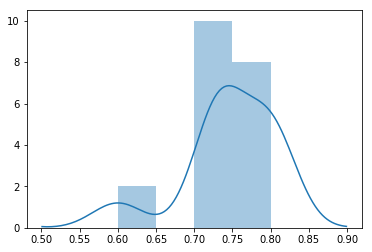

In [439]:
sns.distplot(result)

# Q8 Print the confusion matrix( 1 Marks)

In [440]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [441]:
y_pred = rfc.predict(X_test)
print(sklearn.metrics.confusion_matrix(Y_test, y_pred))

[[101  10]
 [ 22  17]]


In [442]:
from sklearn import metrics
rfc.score(X_test , Y_test)

0.78666666666666663

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [443]:
# predicting 1 as one is 
print("Predicting Defaulter as Defaulter is = ", sklearn.metrics.precision_score(Y_test,y_pred))
print("i.e, ", sklearn.metrics.precision_score(Y_test,y_pred)*100,"%")

Predicting Defaulter as Defaulter is =  0.62962962963
i.e,  62.962962963 %


In [444]:
print("Predicting Non-Defaulter as Non-Defaulter is = ", sklearn.metrics.recall_score(Y_test,y_pred))
print("i.e, ", sklearn.metrics.recall_score(Y_test,y_pred) * 100,"%")

Predicting Non-Defaulter as Non-Defaulter is =  0.435897435897
i.e,  43.5897435897 %


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [445]:
#Hint: Use roc_curve

In [446]:
from sklearn.metrics import roc_curve, auc
y_pred_proba = rfc.predict_proba(X_test)[:,1]

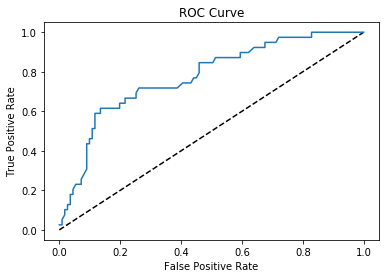

In [447]:
#Roc_Curve and KS
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_proba )
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [448]:
KS = (tpr - fpr).max()
KS

0.48024948024948028

In [449]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test,y_pred)
auc

0.67290367290367292

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [13]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []